In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from datetime import date
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
city_name = []
cloudiness = []
countries = []
dates = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

totalcities = len(cities)
i = 1

print("Beginning Weather Data Retrieval")
print("--------------------------------")
for city in cities:
    try:
        print(f"Processing {city} -- number {i} of {totalcities}....")
        i+=1
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        countries.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        time.sleep(1.02)
    except:
        print(f"Not able to process {city}. Moving to next city.")
        
print(f"Finished! Processed {len(city_name)} of {totalcities} cities.")    

Beginning Weather Data Retrieval
--------------------------------
Processing moron -- number 1 of 614....
Processing provideniya -- number 2 of 614....
Processing praia da vitoria -- number 3 of 614....
Processing kaeo -- number 4 of 614....
Processing saint-leu -- number 5 of 614....
Processing hobart -- number 6 of 614....
Processing mar del plata -- number 7 of 614....
Processing nantucket -- number 8 of 614....
Processing kloulklubed -- number 9 of 614....
Processing hilo -- number 10 of 614....
Processing warqla -- number 11 of 614....
Not able to process warqla. Moving to next city.
Processing ushuaia -- number 12 of 614....
Processing dwarka -- number 13 of 614....
Processing saint george -- number 14 of 614....
Processing punta arenas -- number 15 of 614....
Processing nouadhibou -- number 16 of 614....
Processing honiara -- number 17 of 614....
Processing saskylakh -- number 18 of 614....
Processing yellowknife -- number 19 of 614....
Processing kargopol -- number 20 of 614...

Processing vao -- number 162 of 614....
Processing usinsk -- number 163 of 614....
Processing dubbo -- number 164 of 614....
Processing tawkar -- number 165 of 614....
Not able to process tawkar. Moving to next city.
Processing boden -- number 166 of 614....
Processing san jose -- number 167 of 614....
Processing abu samrah -- number 168 of 614....
Processing saint-augustin -- number 169 of 614....
Processing yulara -- number 170 of 614....
Processing georgetown -- number 171 of 614....
Processing samusu -- number 172 of 614....
Not able to process samusu. Moving to next city.
Processing praia -- number 173 of 614....
Processing halalo -- number 174 of 614....
Not able to process halalo. Moving to next city.
Processing bury saint edmunds -- number 175 of 614....
Not able to process bury saint edmunds. Moving to next city.
Processing ixtapa -- number 176 of 614....
Processing kavaratti -- number 177 of 614....
Processing cagayan de tawi-tawi -- number 178 of 614....
Not able to process 

Processing matam -- number 325 of 614....
Processing itarema -- number 326 of 614....
Processing batemans bay -- number 327 of 614....
Processing tabou -- number 328 of 614....
Processing hasaki -- number 329 of 614....
Processing baruun-urt -- number 330 of 614....
Processing tasiilaq -- number 331 of 614....
Processing thinadhoo -- number 332 of 614....
Processing syumsi -- number 333 of 614....
Processing valera -- number 334 of 614....
Processing ustikolina -- number 335 of 614....
Processing vestmannaeyjar -- number 336 of 614....
Processing damphu -- number 337 of 614....
Processing lamu -- number 338 of 614....
Processing twentynine palms -- number 339 of 614....
Processing arman -- number 340 of 614....
Processing iralaya -- number 341 of 614....
Processing rungata -- number 342 of 614....
Not able to process rungata. Moving to next city.
Processing denpasar -- number 343 of 614....
Processing taksimo -- number 344 of 614....
Processing suntar -- number 345 of 614....
Processin

Processing lagoa -- number 489 of 614....
Processing tiznit -- number 490 of 614....
Processing almaty -- number 491 of 614....
Processing miri -- number 492 of 614....
Processing swellendam -- number 493 of 614....
Processing pimenta bueno -- number 494 of 614....
Processing alice springs -- number 495 of 614....
Processing arlit -- number 496 of 614....
Processing araouane -- number 497 of 614....
Processing asahikawa -- number 498 of 614....
Processing liverpool -- number 499 of 614....
Processing viligili -- number 500 of 614....
Not able to process viligili. Moving to next city.
Processing te anau -- number 501 of 614....
Processing kamaishi -- number 502 of 614....
Processing bealanana -- number 503 of 614....
Processing coahuayana -- number 504 of 614....
Processing chernyshevskiy -- number 505 of 614....
Processing ostrovnoy -- number 506 of 614....
Processing bahia blanca -- number 507 of 614....
Processing channel-port aux basques -- number 508 of 614....
Processing surop -- 

In [20]:
city_dict = {
                "City":city_name,
                "Country":countries,
                "Cloudiness":cloudiness,
                "Date":dates,
                "Humidity":humidity,
                "Latitude":lat,
                "Longitude":long,
                "Max Temp":max_temp,
                "Wind Speed":wind_speed   
            }

city_data_df = pd.DataFrame(city_dict)
#write and save to CSV
city_data_csv = city_data_df.to_csv('city_data.csv',header = True)

#preview the df
city_data_df.head()

,City,Country,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Moron,HT,100,1570072666,77,18.56,-74.26,80.23,2.68
1,Provideniya,RU,75,1570072760,80,64.42,-173.23,39.20,15.66
2,Praia da Vitoria,PT,75,1570073228,82,38.73,-27.07,64.40,8.43
3,Kaeo,NZ,36,1570072680,80,-35.10,173.78,61.00,10.78
4,Saint-Leu,RE,0,1570073230,64,-21.15,55.28,75.20,4.70


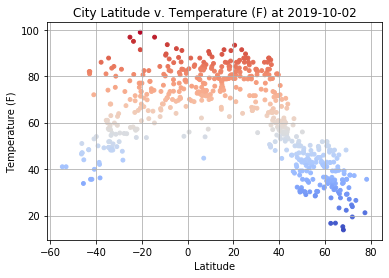

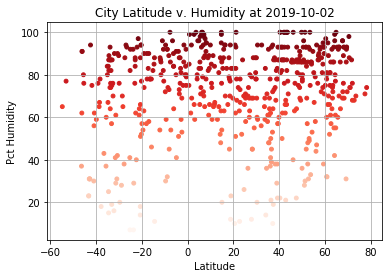

In [21]:
time = city_data_df["Date"].mean()
time = date.fromtimestamp(time)

# chose the coolwarm colormap to better indicate changes in temperature
plt.scatter(city_data_df["Latitude"], city_data_df["Max Temp"], c=city_data_df["Max Temp"], s=15, cmap = "coolwarm", marker = "o")

plt.title(f"City Latitude v. Temperature (F) at {time}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()
# save and show the plot
plt.savefig("images/Lat-vs-Temp.png")
plt.show()


#Latitude vs. Humidity Plot
# chose the Reds colormap to better indicate humidity intensity
plt.scatter(city_data_df["Latitude"], city_data_df["Humidity"], c=city_data_df["Humidity"], s=15, cmap = "Reds", marker = "o")


plt.title(f"City Latitude v. Humidity at {time}")
plt.xlabel("Latitude")
plt.ylabel("Pct Humidity")
plt.grid()

# save and show the plot
plt.savefig("images/Lat-vs-Humidity.png")
plt.show()

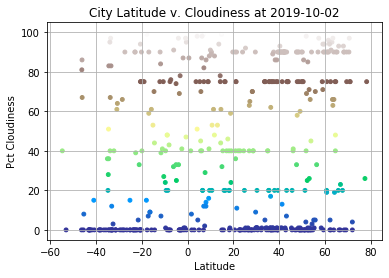

In [22]:
# chose the terrain colormap to better indicate cloud level
plt.scatter(city_data_df["Latitude"], city_data_df["Cloudiness"], c=city_data_df["Cloudiness"],s=15, cmap = "terrain", marker = "o")
plt.title(f"City Latitude v. Cloudiness at {time}")
plt.xlabel("Latitude")
plt.ylabel("Pct Cloudiness")
plt.grid()

# save and show the plot
plt.savefig("images/Lat-vs-Clouds.png")
plt.show()

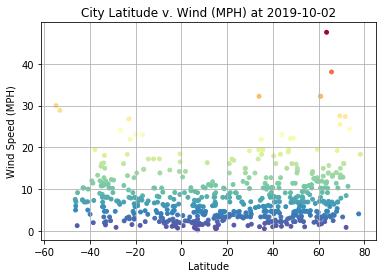

In [14]:
# chose the reversed Spectral colormap to better indicate wind intensity
plt.scatter(city_data_df["Latitude"], city_data_df["Wind Speed"], c=city_data_df["Wind Speed"], s=15, cmap = "Spectral_r", marker = "o")
plt.title(f"City Latitude v. Wind (MPH) at {time}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()

# save and show the plot
plt.savefig("images/Lat-vs-Wind.png")
plt.show()

In [ ]:
#Three Noticable Trends from Data
#1. Temperatures closer to 0 degrees latitude is higher than other degrees because those points are closer to the equater,
#which tends to be hotter than points further away.
#2. It is hard to decipher a trend between wind speed and latitude because there is a concentration of points at or 
#below 10mph across the board for different degrees of longitude.  This could vary depending on the season, hurricanes,
#typhoons, or other types of natural occurances.
#3. With Cloudiness and Latitude, there seems to be no kind of significant trend because the clouds change all day, due 
# to change in weather and just because of the rotation of Earth.  So latitude will have no effect on how many clouds
#a certain region may have.